<a href="https://colab.research.google.com/github/AkshataKishore/HeartAttack-Prediction/blob/main/Insulin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install.packages("devtools")
devtools::install_github("erblast/easyalluvial")
install.packages("healthcareai")
library(healthcareai)

In [ ]:
str(pima_diabetes)
df<-pima_diabetes

In [ ]:
df1<-df[-1]
colnames(df1)
df2<-na.omit(df1)
summary(df2)
df2$weight_class<-as.factor(df2$weight_class)
df2$diabetes<-as.factor(df2$diabetes)

In [29]:
suppressPackageStartupMessages( require(easyalluvial) )
suppressPackageStartupMessages( require(tidyverse) )

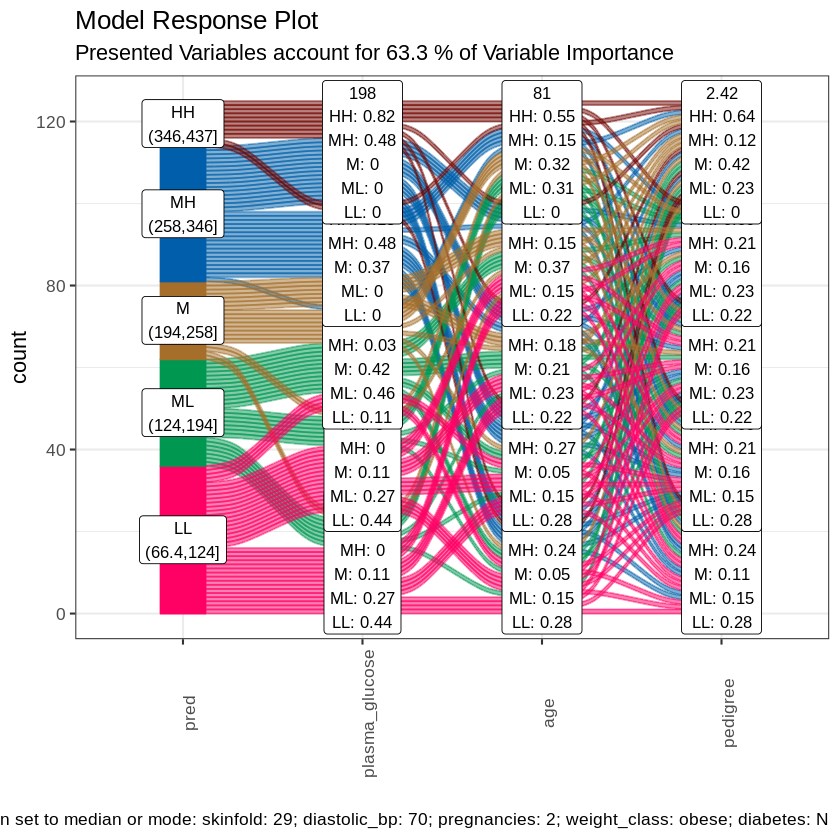

In [131]:

m = randomForest::randomForest(insulin ~ ., df2)
imp = m$importance
dspace = get_data_space(df2, imp, degree = 3)

pred = predict(m, newdata = dspace,type = 'response')
p = alluvial_model_response(pred, dspace, imp, degree = 3)
p

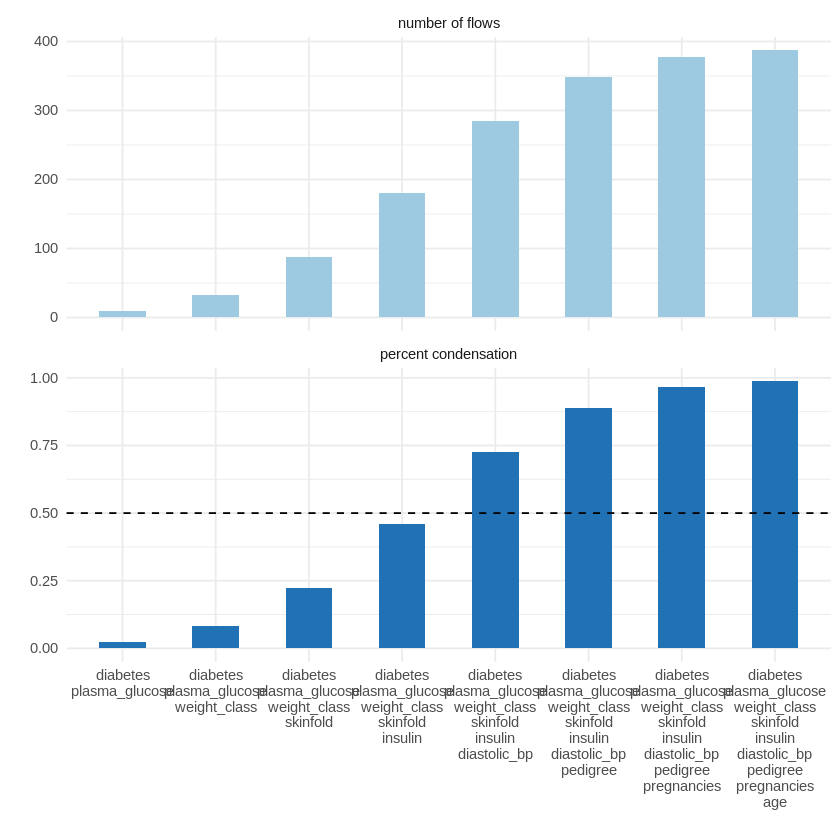

In [136]:
plot_condensation(df2, first = diabetes)

In [ ]:
forest <- randomForest::randomForest(Species ~ ., data = iris, localImp = TRUE)
#explain
suppressPackageStartupMessages(suppressMessages(suppressWarnings(explain_forest(forest, interactions = TRUE))))

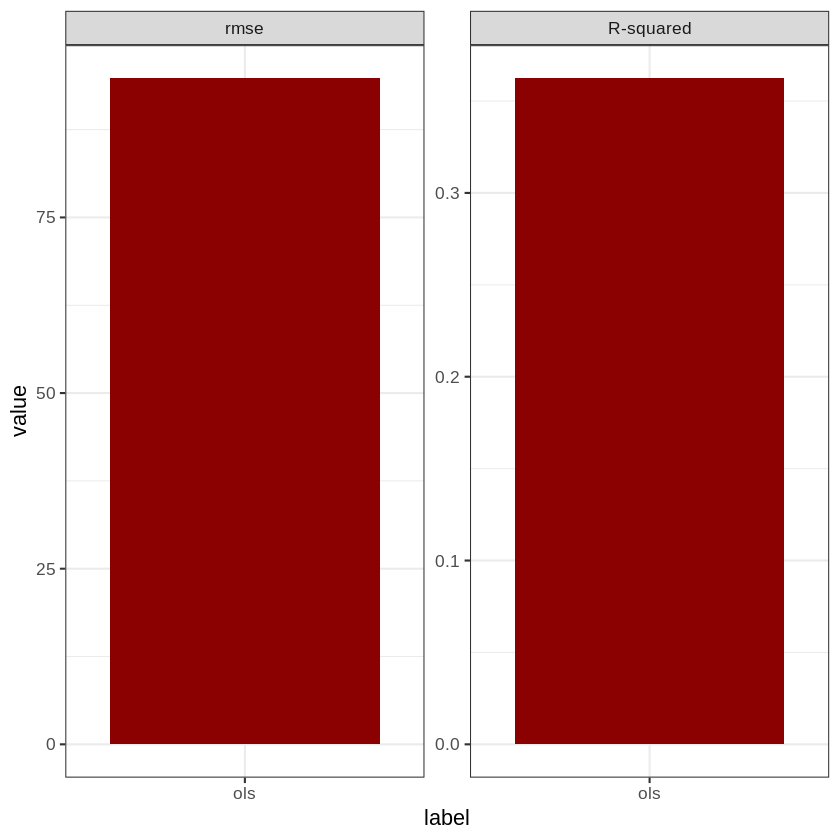

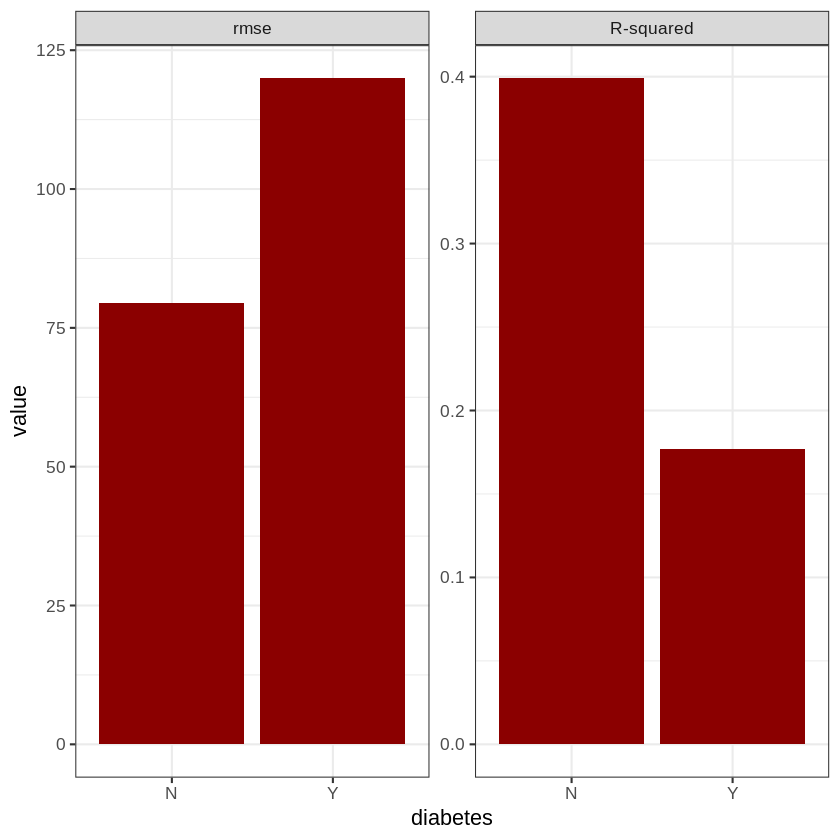

In [118]:

# Fit model
fit <- lm(insulin ~ ., data = df2)

# Make flashlight
fl <- flashlight(model = fit, data = df2, y = "insulin", label = "ols",
                 metrics = list(rmse = rmse, `R-squared` = r_squared))

# Performance: rmse and R-squared
plot(light_performance(fl), fill = "darkred")
plot(light_performance(fl, by = "diabetes"), fill = "darkred")

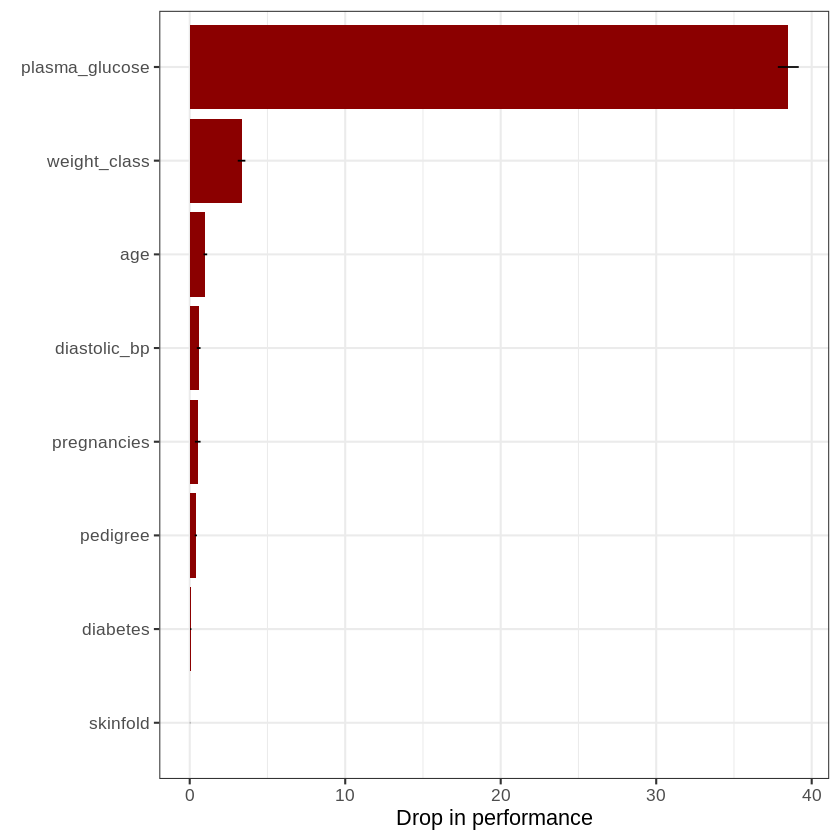

[1] "plasma_glucose" "weight_class"

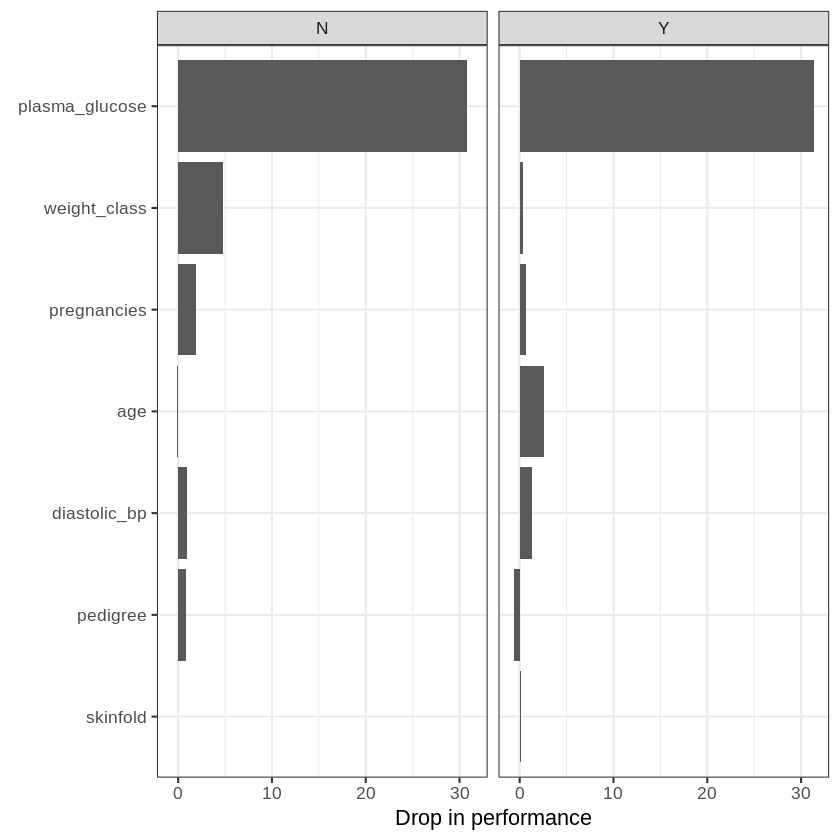

In [119]:

# Variable importance by increase in rmse
imp <- light_importance(fl, m_repetitions = 10)
plot(imp, fill = "darkred")
plot(light_importance(fl, by = "diabetes")) +
   scale_fill_viridis_d(begin = 0.2, end = 0.8)
most_important(imp, 2)

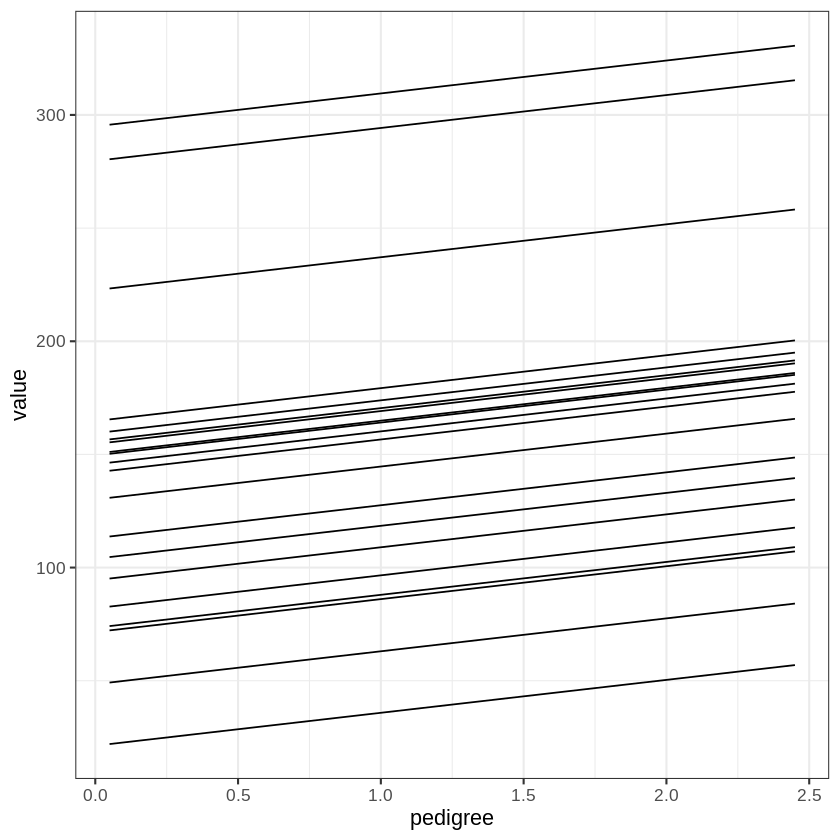

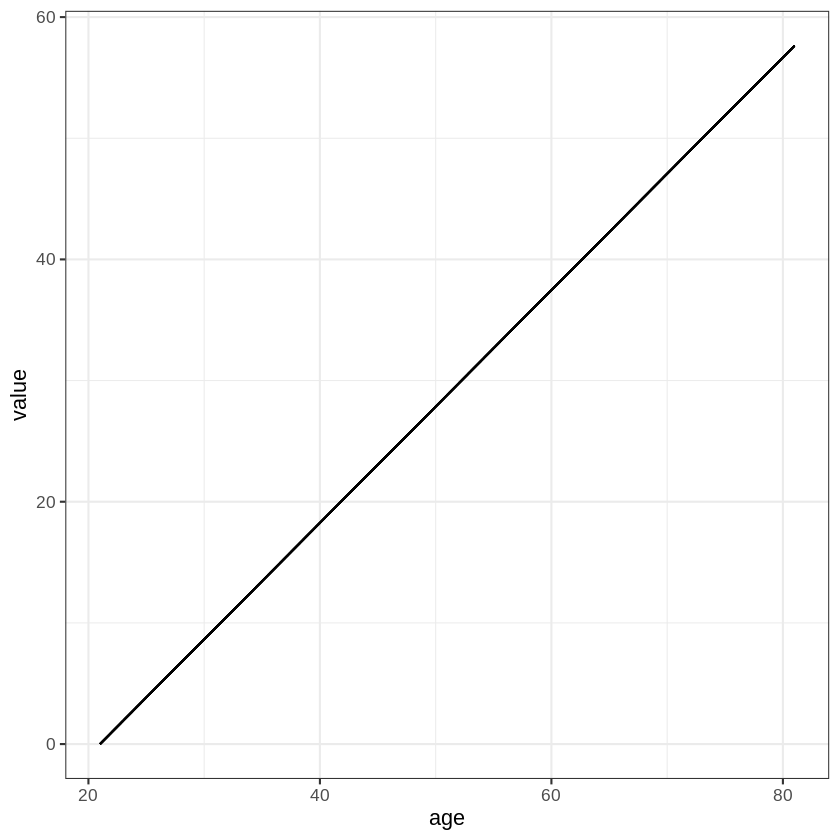

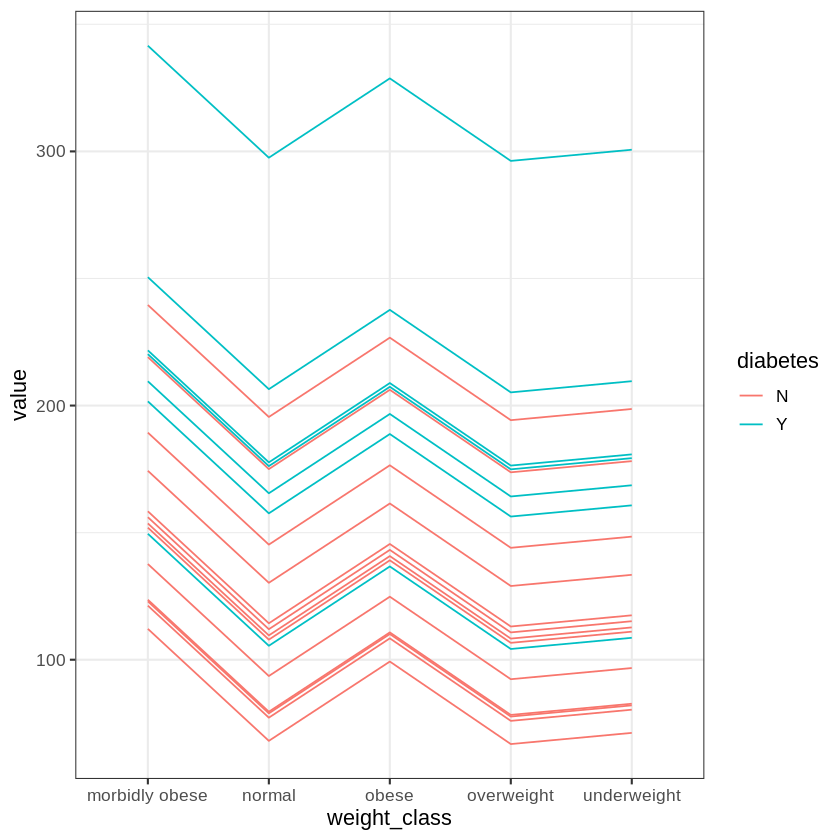

In [120]:
# ICE profiles for Petal.Width
plot(light_ice(fl, v = "pedigree"))
plot(light_ice(fl, v = "age", center = "first"))
plot(light_ice(fl, v = "weight_class", by = "diabetes"))

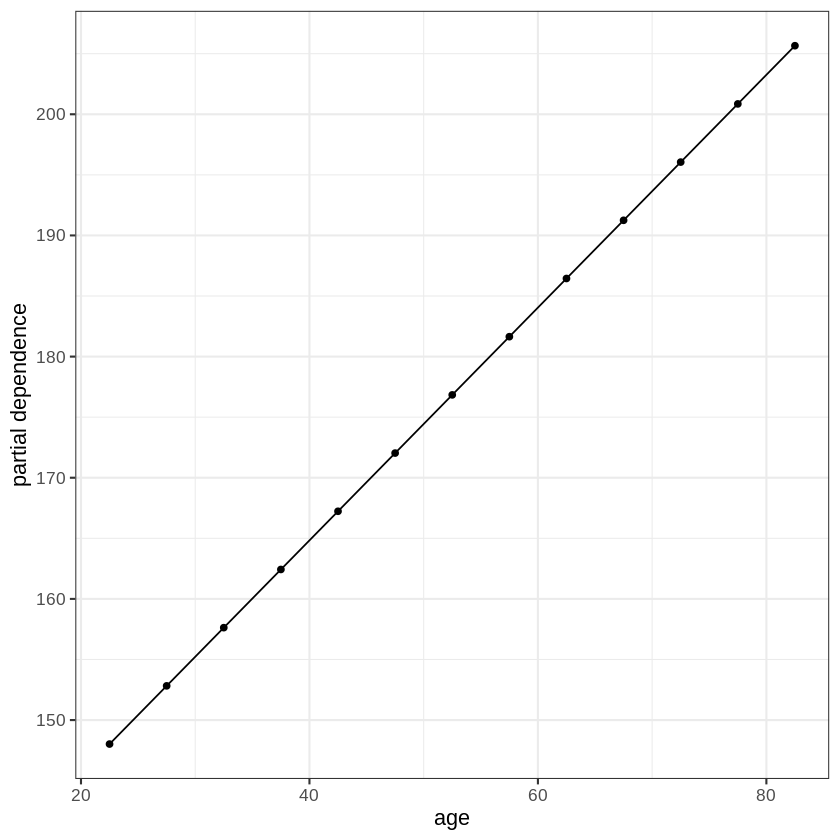

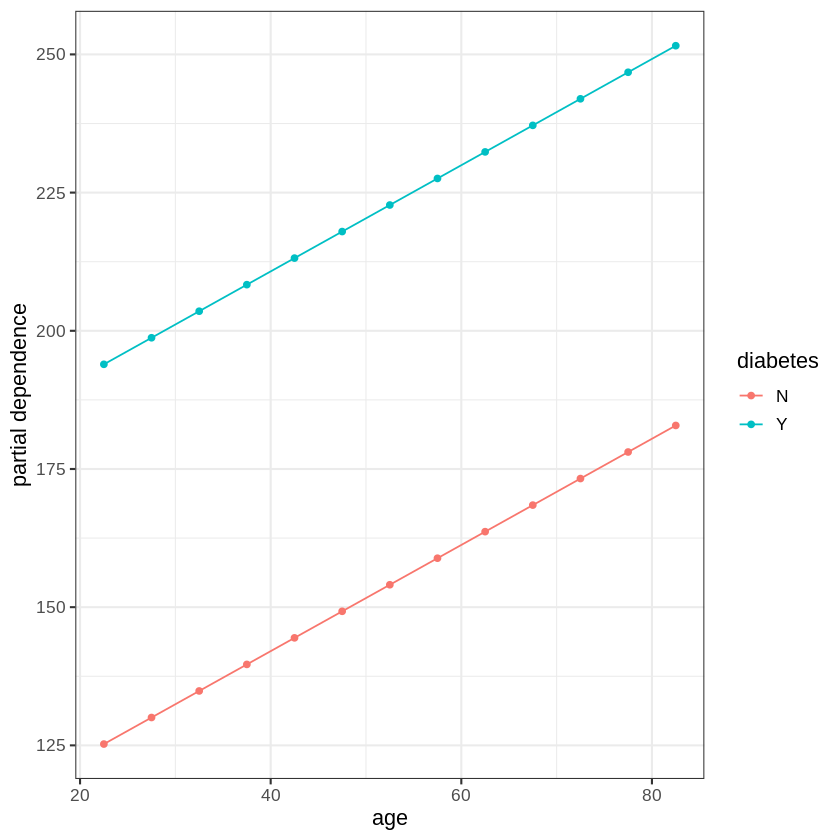

In [121]:
# Partial dependence profiles for Petal.Width
plot(light_profile(fl, v = "age"))
plot(light_profile(fl, v = "age", by = "diabetes"))

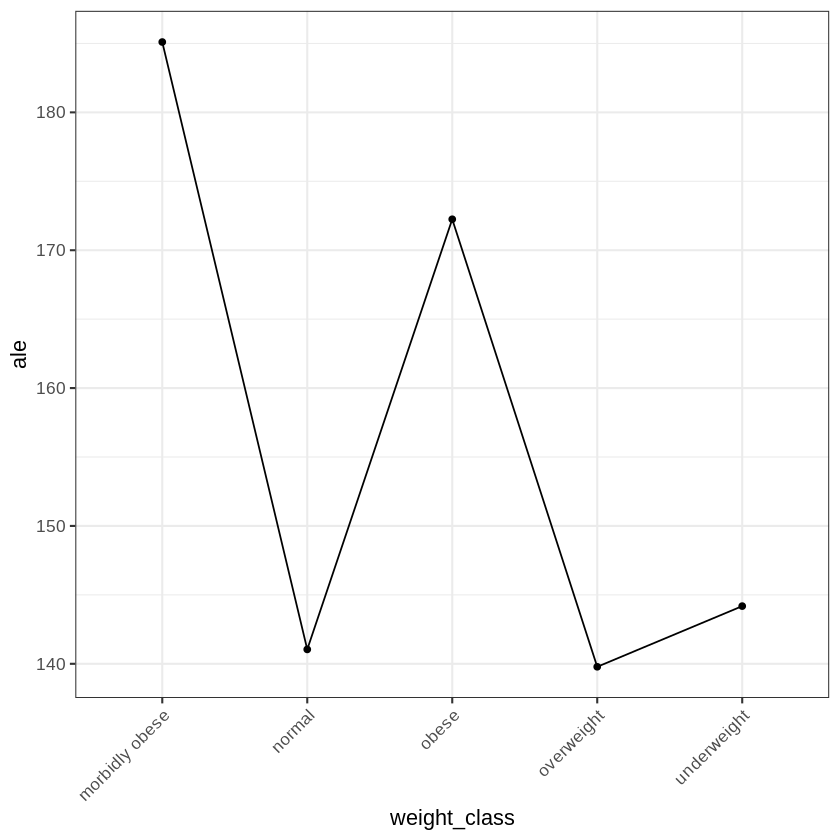

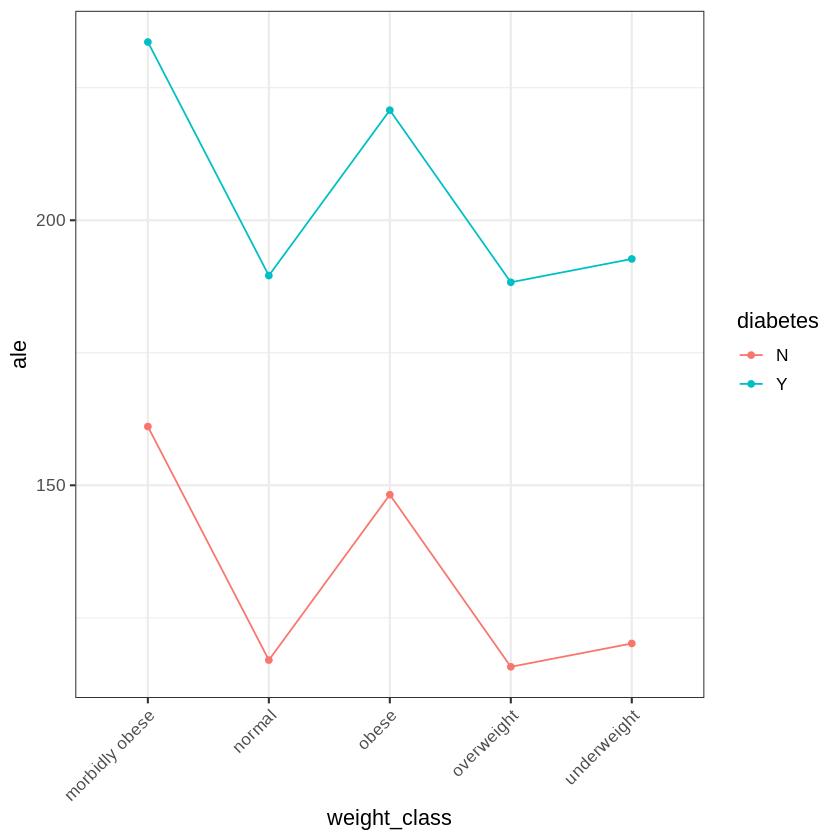

In [122]:
# Accumulated local effects (ALE) profiles for Petal.Width
plot(light_profile(fl, v = "weight_class", type = "ale"))
plot(light_profile(fl, v = "weight_class", by = "diabetes", type = "ale"))

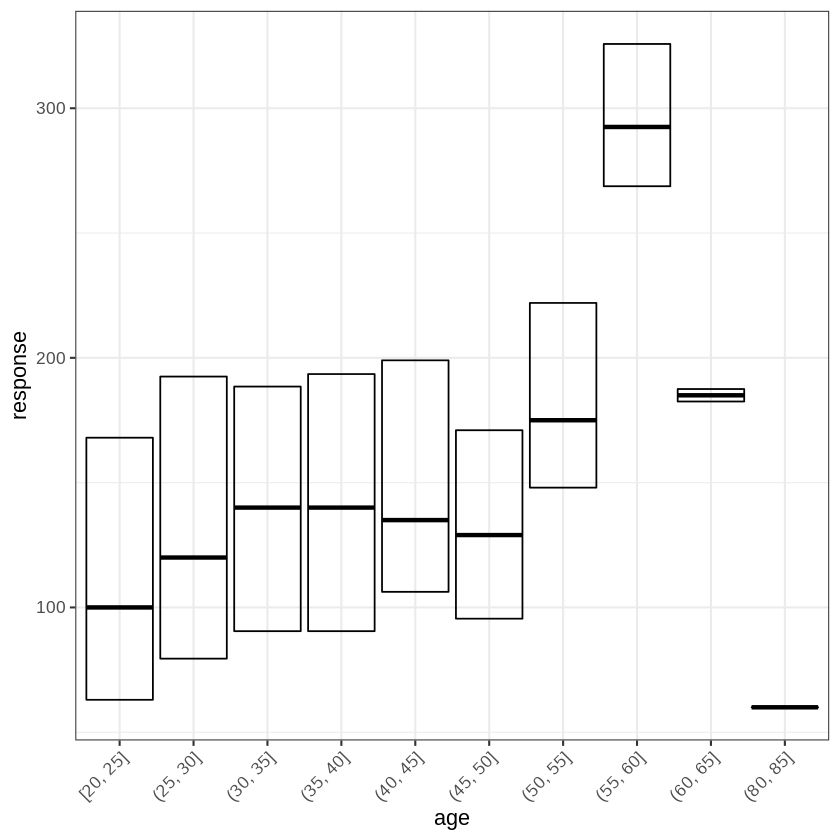

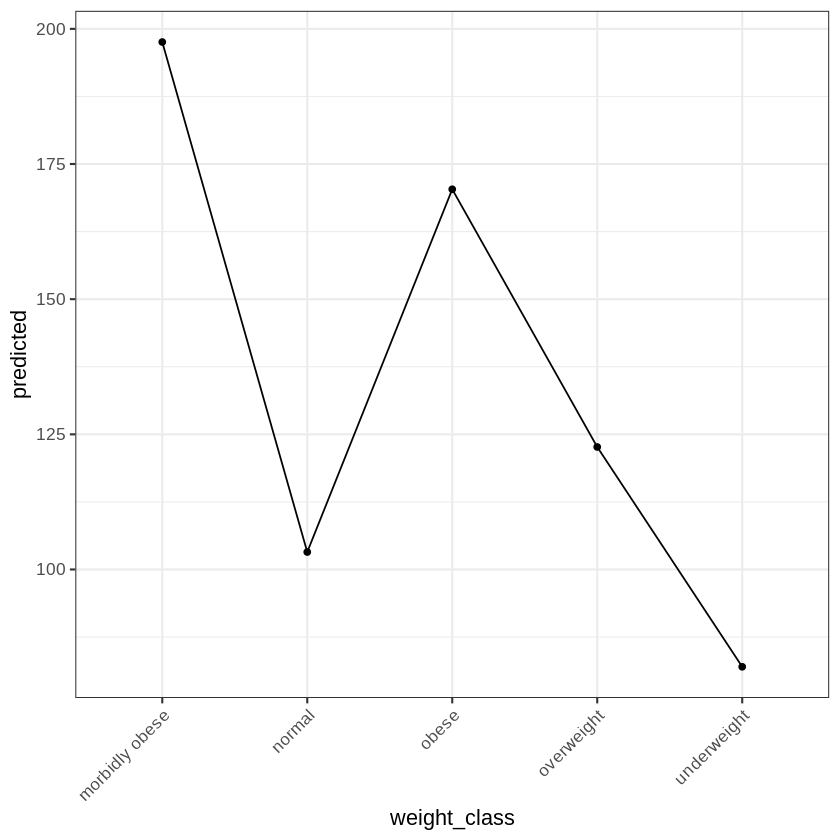

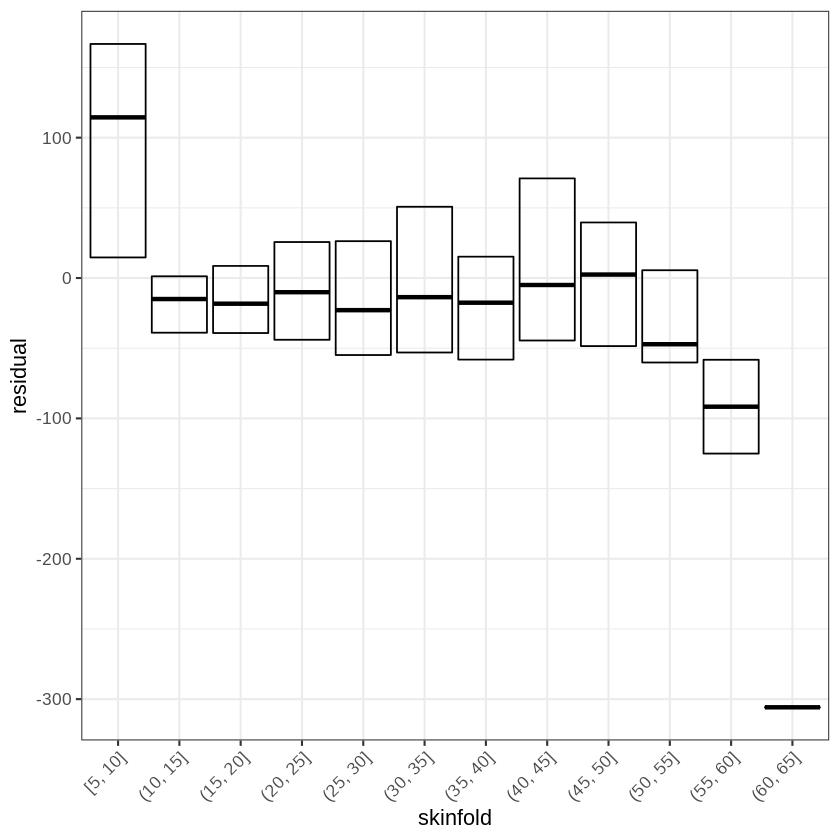

In [123]:
# Prediction, response and residual profiles
plot(light_profile(fl, v = "age", type = "response", stats = "quartiles"))
plot(light_profile(fl, v = "weight_class", type = "predicted"))
plot(light_profile(fl, v = "skinfold", type = "residual", stats = "quartiles"))

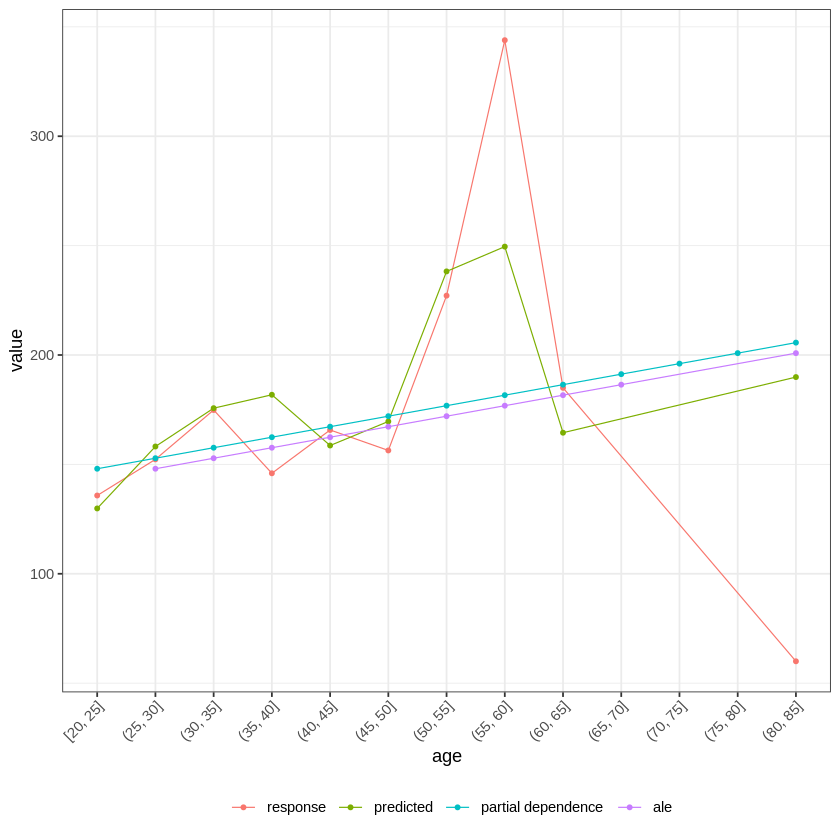

In [124]:
# Response profiles, prediction profiles, partial depencence, and ALE profiles in one
plot(light_effects(fl, v = "age"), use = "all")

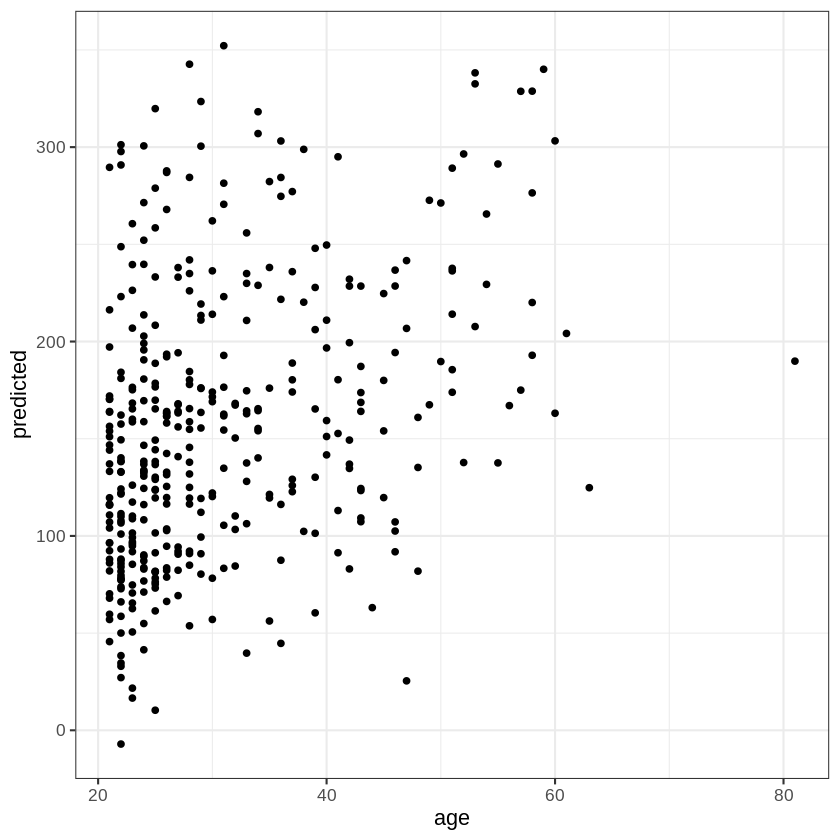

In [126]:
# Scatter plots
plot(light_scatter(fl, v = "age", type = "predicted"))

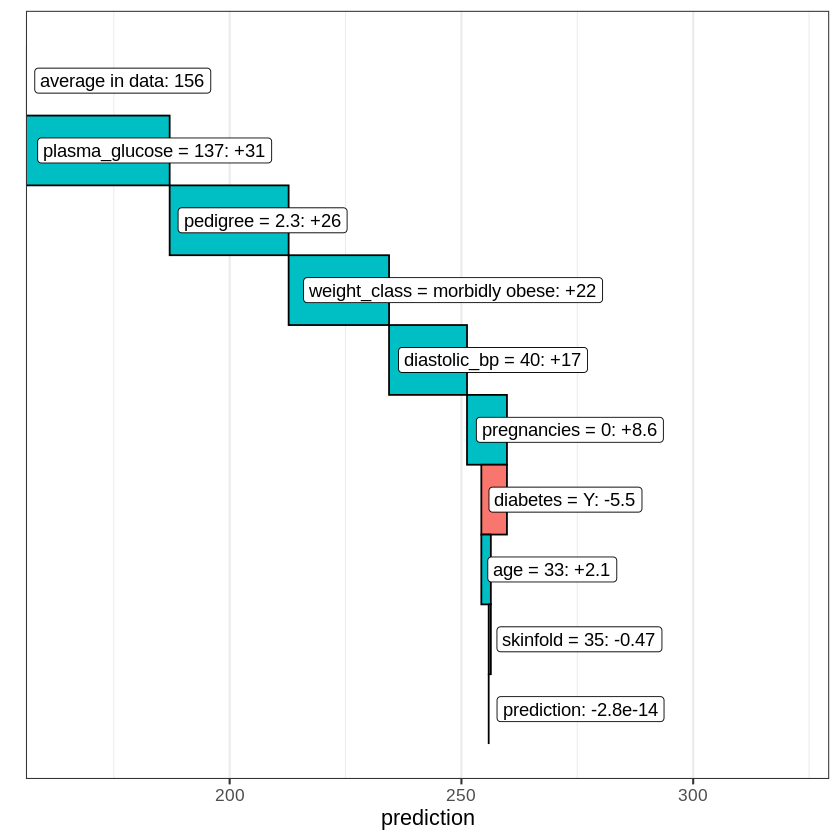

In [127]:
# Variable contribution breakdown for single observation
plot(light_breakdown(fl, new_obs = df2[2, ]))


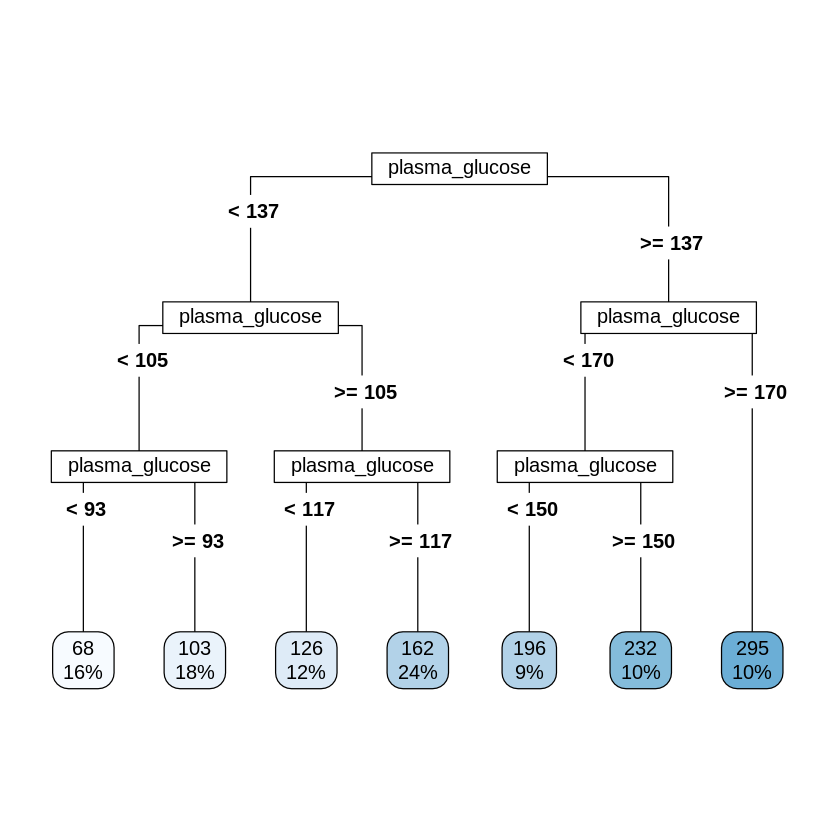

In [128]:
# Global surrogate
plot(light_global_surrogate(fl))